# Equação de Laplace 

* PET - Física UFRN
* Petiano: José Emanuel Vasconcelos Oliveira
* Data: 27/01/2025

$\quad$ Neste `Notebook`, veremos a equação de Laplace, suas aplicabilidades e métodos para resolver essas equações analítica e numericamente. Além disso, investigaremos como o sistema de coordenadas e as condições de contorno do sistema definem a solução para o caso. As soluções dessas equações no presente `Notebook` serão abordadas da maneira mais didática possível. Utilizaremos aqui uma abordagem numérica relatada no livro de Mark Newman [1]. Por fim, iremos verificar se as soluções numéricas e analíticas possuem boa concordância. O `Notebook` seguirá a seguinte estrutura:
1. *Introdução*
2. *Algumas soluções analíticas*
3. *Soluções numéricas*
4. *Conclusão*

## Pré-requisitos

$\quad$ Para este `Notebook`, o leitor não deve se preocupar com bibliotecas, visto que usaremos as padrões do python. Entretanto, é aconselhável que o leitor possua um conhecimento prévio em cálculo vetorial e diferencial.

### Importando bibliotecas

In [6]:
import numpy as np
import matplotlib.pyplot as plt

### Detalhes das bibliotecas

In [8]:
%load_ext watermark
%watermark -p numpy,matplotlib

numpy     : 1.26.4
matplotlib: 3.9.2



## Introdução

$\quad$ Uma das ferramentas mais importantes na física, com certeza, é a derivada e os respectivos operadores diferenciais. Em diversos problemas físicos, as equações utilizadas para a modelagem de problemas envolvem derivadas de campos escalares ou vetoriais. Um operador diferencial fundamental na física é o Nabla ($\nabla$), que indica derivação parcial de um campo em relação às componentes espaciais de um determinado sistema de coordenadas. Em um sistema cartesiano, definimos o operador como:


$$
\nabla = \hat{i} \frac{\partial}{\partial x} + \hat{j} \frac{\partial}{\partial y} + \hat{k} \frac{\partial}{\partial z}.  \tag{1}
$$

$\quad$ O operador descrito em (1) atua sobre campos escalares e o transforma em um campo vetorial, com cada componente sendo a respectiva derivada. Ao realizarmos uma operação do tipo $\nabla f$, estamos calculando o gradiente de um determinado campo escalar. Outra operação importante, usando o Nabla, é calcular o divergente. Essa operação é feita sobre campos vetoriais e os transforma em campos escalares, com cada componente do campo sendo derivada em relação à respectiva coordenada. Em termos matemáticos, isso é:

$$
\nabla \cdot \ \vec{F} = \frac{\partial F_x}{\partial x} + \frac{\partial F_y}{\partial y} + \frac{\partial F_z}{\partial z}. \tag{2}
$$

$\quad$ Agora, podemos utilizar os resultados de (1) e (2) de forma a obter o operador alvo deste `Notebook`. Tratando agora $\nabla f = \vec{F}$ e calculando seu divergente, definimos o operador Laplaciano:

$$
\nabla^2 f = \nabla \cdot \nabla f = \frac{\partial}{\partial x} \left( \frac{\partial f}{\partial x} \right) + \frac{\partial}{\partial y} \left( \frac{\partial f}{\partial y} \right) + \frac{\partial}{\partial z} \left( \frac{\partial f}{\partial z} \right) = \frac{\partial^2 f}{\partial x^2}+\frac{\partial^2 f}{\partial y^2} + \frac{\partial^2 f}{\partial z^2}. \tag{3}
$$

$\quad$ Em (3), consideramos um sistema de coordenadas cartesianos. Entretanto, a forma do Laplaciano pode ser alterada a depender do sistema de coordenadas que estamos trabalhando. Um exemplo que será útil posteriormente são as coordenadas polares. Imaginemos um problema descrito em torno de uma região circular. Seria muito mais fácil se pudéssemos descrevê-lo como função de seu raio e ângulo. A mudança de coordenadas cartesianas para polares é descrita como:

$$
x = \rho \cos(\theta); \ \ y = \rho \sin(\theta); \tag{4}
$$

onde $\rho =  x^2 + y^2$, ou seja, a distância de um ponto qualquer até a origem; e $\theta =  tg^{-1}(y/x)$, o ângulo entre a reta que liga o ponto à origem e o eixo x. Esse ângulo também é conhecido como ângulo polar. Vale lembrar que as coordenadas polares são um sistema de coordenadas bidimensional. Podemos tratá-la como um caso específico das coordenadas cilíndricas. Porém, essa discussão mais elaborada não irá agregar muito para o nosso trabalho.

$\quad$ Nesse sistema de coordenadas, o Laplaciano se apresenta de maneira diferente, considerando agora uma função dependente das coordenadas polares ($f = f(r,\theta)$). Isso acontece devido ao ajuste dos diferenciais de posição e à normalização dos vetores na nova base. Para um maior aprofundamento, consultar a referência [2]. Ao realizar as operações necessárias, conseguimos expressar o Laplaciano nesse sistema de coordenadas como:

$$
\nabla^2 f(r,\theta)= \frac{\partial^2 f}{\partial r^2} + \frac{1}{r}\frac{\partial f}{\partial r} + \frac{1}{r ^2}\frac{\partial^2 f}{\partial \theta^2}. \tag{5}
$$

$\quad$ Para esse `Notebook`, consideramos apenas o operador Laplaciano atuando sobre campos escalares, apesar de que existe também o Laplaciano Vetor, aplicado a campos vetoriais. Diversos campos da física utilizam equações que envolvem o cálculo do Laplaciano, como, por exemplo, a equação da onda. Outro uso fundamental desse operador está atrelado ao eletromagnetismo.

$\quad$ Vamos utilizar para essa análise a primeira equação de Maxwell, em sua forma diferencial. Essa equação relaciona a divergência do campo elétrico com a densidade de cargas de uma determinada região: 

$$
\nabla \cdot \vec{E} = \frac{\rho}{\epsilon_0}, \tag{5}
$$

onde $\vec{E}$ representa o campo elétrico, $\rho$ a densidade volumétrica de cargas e $\epsilon_0$ é a constante de permissividade elétrica no vácuo. Porém, podemos definir o campo elétrico como negativo do gradiente de um potencial $\phi$ qualquer. Dessa dorma, a equação (5) se torna:

$$
\nabla \cdot (- \nabla \phi) = \frac{\rho}{\epsilon_0} \Rightarrow \nabla ^2 \phi = - \frac{\rho}{\epsilon_0}. \tag{6}
$$

$\quad$ A equação acima é conhecida como a equação de Poisson. Apesar de muito interessante, ela de maneira geral não será abordada nesse `Notebook`. A equação de Poisson é uma equação diferencial parcial, linear, não-homogênea, de segunda ordem e com coeficientes constantes. Fazendo com que a densidade de cargas seja nula (uma região eletricamente neutra, ou o vácuo, por exemplo), obtemos diretamente de (6): 

$$
\nabla ^2 \phi = 0. \tag{7}
$$

Finalmente, chegamos à esperada *Equação de Laplace*, a qual iremos conter nossa análise. Essa equação é fundamental em diversos campos da física, para além do eletromagnetismo e também possui muita relevância em diversas áreas da matemática. A *Equação de Laplace* é uma equação diferencial parcial, linear, homogênea, de segunda ordem e com coeficientes constantes. Posteriormente, mostraremos que as soluções dessa equação são totalmente dependentes das condições de contorno e sistema de coordenadas. Entretanto, é possível verificar que, a depender das condições de contorno específicas, só existe uma única solução para a equação. Essa proposição é resultado do Teorema de Unicidade da solução [3]. 

## Algumas soluções analíticas

### Coordenadas cartesianas

$\quad$ Neste `Notebook`, simularemos problemas relacionados ao eletromagnetismo. Entretanto, nesta seção, vamos mencionar métodos gerais para solucionar a equação de Laplace em coordenadas cartesianas e polares. Além disso, vamos tratar alguns casos específicos e desenvolver a matemática necessária para encontrar soluções fechadas para o problema.

$\quad$ Para solucionar a *Equação de Laplace*, vamos primeiro tratar de um caso cartesiano. Definimos uma função $\Phi = \Phi (x,y)$. Além disso, precisamos definir a região onde a nossa função obedecerá à equação. Definimos que $\Phi$ seja finita e bem definida no retângulo $0 < x < a$, $0 < y < b$. Por fim, precisamos definir as condições de contorno por serem fundamentais para a forma que a solução se apresente. Vamos impor que $\Phi(x,y)$ obedeça:


$$
\begin{aligned}
\Phi(x, 0) &= 0, \quad \Phi(x, b) = 0, \quad &0 < x < a, \\
\Phi(0, y) &= 0, \quad \Phi(a, y) = f(y), \quad &0 \leq y \leq b.
\end{aligned}
\tag{8}
$$


Aqui, $f(y)$ é uma função qualquer definida no intervalo $0 < y < b$.

$\quad$ Agora, vamos tratar a matemática para solucionar nossa equação. Utilizemos o método de separação de variáveis. Nesse método, dizemos que a função potencial seja resultado do produto de duas funções, cada uma dependente de apenas uma coordenada, ou seja, $\Phi (x,y) = X(x) Y(y)$. Agora, substituímos esse resultado na equação (7) para obter:

$$
\frac{\partial^2 \Phi}{\partial x^2} + \frac{\partial^2 \Phi}{\partial y^2} = 0 \Rightarrow \frac{\partial^2 X(x)Y(y)}{\partial x^2} + \frac{\partial^2 X(x)Y(y)}{\partial y^2} = 0. \tag{9}
$$

Desenvolvendo as derivadas:

$$
Y(y) \frac{d^2  X(x)}{dx^2}+ X(x) \frac{d^2  Y(y)}{dy^2}  = 0. \tag{10}
$$

Aqui, usamos a derivada total, visto que as respectivas funções são dependentes de apenas uma variável. Dividindo (10) por $X(x)$ e $Y(y)$ e omitindo as variáveis entre parênteses, teremos:

$$
\frac{1}{X}\frac{d^2 X}{dx} + \frac{1}{Y}\frac{d^2 Y}{dy^2} = 0 \Rightarrow \frac{1}{X}\frac{d^2 X}{dx^2} = -\frac{1}{Y}\frac{d^2 Y}{dy^2}. \tag{11}
$$

$\quad$ Vamos discutir um pouco sobre a equação (11). Ela nos garante a igualdade da divisão entre a segunda derivada de uma função dependente unicamente de $x$ e a própria função de $x$, e o negativo da divisão entre a segunda derivada de uma função dependente exclusivamente de $y$ e a própria função de $y$.  Note que, se em algum dos membros da igualdade existir um termo relacionado a uma das variáveis, o outro termo não conseguirá obter esse resultado, visto que as funções são unicamente dependentes. Logo, a única maneira dessa igualdade ser válida é se o resultado de ambas as divisões for uma constante real. Em termos matemáticos, isso significa que:

$$
\frac{1}{X}\frac{d^2 X}{dx^2} = k^2 \; \ \  ; \; \frac{1}{Y}\frac{d^2 Y}{dy^2} = -k^2, \tag{12}
$$

onde $k$ é uma constante real que está levada ao quadrado apenas para melhorar a notação futuramente. 

$\quad$ As expressões em (12) são equações diferenciais ordinárias, lineares, de segunda ordem, homogêneas e de coeficientes constantes, muito mais simples de serem resolvidas que as expressões (6) e (7). Vamos obter as soluções a partir do método do polinômio característico e suas raízes. Se o leitor quiser um maior aprofundamento sobre esse método de resolução de EDO's, sugerimos a referência [4]. Trataremos apenas a expressão para a função $X(x)$, visto que o processo para a função $Y(y)$ é análogo. Ao final, as soluções para ambas serão mostradas.

$\quad$ Multiplicando a primeira expressão de (12) por $X$ e subtraindo o termo $kX$ aos dois lados da equação, obtemos:

$$
\frac{d^2 X}{dx^2} - k^2X = 0. \tag{13}
$$

Agora, substituímos as derivadas em (13) em função do grau do polinômio de uma variável $\lambda$. Obtendo assim:

$$
\lambda ^2 - k^2 = 0. 
$$

Precisamos encontrar as raízes dessa equação. É fácil ver que elas são na forma:

$$
\lambda = \pm k.
$$

$\quad$ Com as raízes do polinômio característico em mãos, podemos voltar à nossa expressão (13) e afirmas que as raízes, de maneira geral, são:

$$
X(x) = A \cosh(kx) + B \sinh(kx), \tag{14}
$$

em que $A$ e $B$ são constantes reais. A solução poderia ser dada em termos de exponenciais. Entretanto, é conveniente deixar a expressão em função das relações trigonométricas hiperbólicas.

$\quad$ O processo de solução para a função $Y$ é análogo e obteremos, por fim:

$$
Y(y) = C \cos{(ky)} + D \sin{(ky)}, \tag{15}
$$

com $C$ e $D$ sendo constantes reais. Com isso, obtemos de maneira geral a solução para a equação (9) como sendo o produto entre as expressões (14) e (15). Entretanto, vamos melhorar nossa solução impondo condições de contorno bem definidas.

$\quad$ Lembremos que nossa função $\Phi$ é produto de duas funções, cada uma dependente de uma única variável. Se analisarmos as condições impostas em (8), conseguimos boas informações sobre o comportamento da função $Y(y)$. Afirmamos isso, pois, para qualquer valor de $x$, quando $y$ é restrito em $0$ ou em $b$, as condições implicam que $\Phi = 0$. As únicas maneiras para que essa afirmação seja válida são: $X(x) = 0$ para qualquer valor de $x$, o que não queremos por resultar numa restrição de soluções; ou $Y(0) = Y(b) = 0$, que será a maneira com que levaremos a seguir nossa análise.  

$\quad$ Agora, vamos substituir as condições que discutimos anteriormente na expressão (15), a fim de descobrir quais os valores das constantes $C$ e $D$ que satisfazem as nossas condições de contorno. Fazendo $y = 0$:

$$
Y(0) = C \cos(0) + D \sin(0) = 0 \rightarrow C = 0.
$$

Assim, obtemos que $Y(y)$ não possui contribuição da função cosseno. Fazendo o mesmo procedimento anterior, porém com $y=b$ e descartando o termo que acompanha a constante nula:

$$
Y(b) = D \sin(bk) = 0. \tag{16}
$$

Note que a expressão (16) é produto de uma constante por um seno de um argumento bem definido. Queremos buscar soluções não triviais, ou seja, vamos fazer com que $D \neq 0$ para que nossa função $Y \neq 0$, e possamos obter um leque de soluções mais diverso. Assim, para que (16), seja verdadeira, devemos fazer com que $\sin(bk) = 0$, isso só será possível se:

$$
bk = n \pi \rightarrow k = \frac{n \pi}{b}, \quad n \in \mathbb{N}. \tag{17}
$$

Podemos estender o valor de $n$ para todos os inteiros. Entretanto, a fim de facilitar as futuras condições, vamos mantê-lo como no conjunto dos naturais. Com isso, finalmente obtemos uma solução para a nossa função $Y(y)$, que é da forma:

$$
Y(y) = D \sin \left(\frac{n \pi y}{b} \right), \tag{18}
$$

em que a constante $D$ será abordada posteriormente.

$\quad$ Vamos agora verificar como se comporta a função $X$ a depender das condições de contorno e da restrição para $k$ obtida em (17). Por (8), devemos ter que $X(0) = 0$, pelos mesmos argumentos utilizados no desenvolvimento da função $Y$. Sendo assim, fazendo $x = 0$ em (14):

$$
X(0) = A \cosh(0) + B \sinh(0) = 0 \rightarrow A = 0.
$$

Assim, não há contribuição da função cosseno hiperbólico para a função $X$. Podemos substituir a expressão para $k$ em (17) em (14) e desprezando o termo nulo para obter que:

$$
X(x) = B \sinh \left(\frac{n \pi x}{b} \right). \tag{19}
$$

$\quad$ Com posse da forma para as funções $X(x)$ e $Y(y)$, podemos fazer o produto de (18) com (19) para finalmenter obtermos nossa função fundamental $\Phi (x,y)$:

$$
\begin{aligned}
\Phi_n (x,y) = X(x)Y(y) \rightarrow \Phi_n(x,y) = \sinh \left(\frac{n \pi x}{b} \right)  \sin \left(\frac{n \pi y}{b} \right) 
\\
\\
\Phi_n(x,y) = \sinh \left(\frac{n \pi x}{b} \right)\sin \left(\frac{n \pi y}{b} \right) \quad \quad \quad \quad
\end{aligned}
, \quad n \in \mathbb{N}.
\tag{20}
$$

Note que assumimos uma função fundamental, de modo que as constantes multiplicativas são iguais à unidade. Além disso, escrevemos a função com índice $n$, para denotar que, para cada valor de $n$, obtemos uma solução válida. De modo à verificação, o leitor pode substituir a expressão encontrada em (20) na equação (9) e notar que obedece perfeitamente à *Equação de Laplace*. Além disso, é possível verificar que uma combinação linear de (20) também é solução de (9). Assim, podemos escrever que:

$$
\Phi (x,y) = \sum_{n=0} ^{N} P_n \sinh \left(\frac{n \pi x}{b} \right)\sin \left(\frac{n \pi y}{b} \right). \tag{21}
$$

onde $P_n$ representa a constante n-ésima solução e pode ser entendida como o produto das constantes $B$ e $D$ das equações (18) e (19).

$\quad$ O leitor deve ter notado que, até então, não utilizamos a última condição de (8). Para utilizarmos, devemos lembrar de outro conceito muito importante na matemática: a Série de Fourier. Ela nos diz que, se uma determinada função $g(u)$, definida em uma região $-L < u < L$, e sua derivada forem contínuas com uma quantidade finita de descontinuidades de primeira espécies (que possui limites laterais), então $g(u)$ pode ser representada fielmente por uma soma infinita de senos e cossenos. Em resumo, o que queremos dizer é que:

$$
g:[-L,L] \rightarrow \mathbb{R} \Rightarrow g(u) = \frac{b_0}{2} + \sum_{n=1}^{\infty} a_n \sin \left(\frac{n \pi u}{L} \right) +  b_n\cos \left(\frac{n \pi u}{L}\right), \tag{22}
$$

de forma que a série é igual a função no intervalo de $-L$ a $L$. Os coeficientes $a_n$ e $b_n$ são definidos como:

$$
\begin{aligned}
a_n = \frac{1}{L}\int_{-L}^L g(u) \sin \left(\frac{n \pi u}{L} \right) du
\\
\\
b_n  = \frac{1}{L}\int_{-L}^L g(u) \cos \left(\frac{n \pi u}{L} \right) du
\end{aligned}
\tag{23}
$$

As demonstrações para que os coeficientes se apresentem dessa maneira envolvem a ortogonalidade das funções seno e cosseno. A demonstração foge do objetido e escopo deste `Notebook`, mas sugerimos que, caso tenha interesse, o leitor consulte as referências [4] ou [5] para maior aprofundamento.

$\quad$ Com conhecimento sobre a Série de Fourier, podemos finalmente resolver por completo nosso problema. Primeiro, fazemos $x = a$ na equação (21) para obter:

$$
\Phi(a,y) = \sum_{n=0} ^{N} P_n \sinh \left(\frac{n \pi a}{b} \right)\sin \left(\frac{n \pi y}{b} \right). \tag{24}
$$

Para que respeitemos a condição de contorno em que $\Phi(a,y) = f(y)$, devemos ter que $N \rightarrow \infty$ em (24), de forma a escrever essa expressão como a Série de Fourier da função $f(y)$:

$$
\Phi(a,y) = \sum_{n=0} ^{\infty} P_n \sinh \left(\frac{n \pi a}{b} \right)\sin \left(\frac{n \pi y}{b} \right) = f(y). \tag{25}
$$

Percebemos, em comparação de (25) com (22), que não existe contribuição de termos múltiplos de cossenos na nossa representação em Série de Fourier da função. Isso significa que, mesmo sem percebermos, $f$ sofreu uma extensão ímpar para o intervalo $-b < y < 0$. Lembremos que nossa função só estava definida para $0 \leq y \leq b$. Assim, impomos que nossa função esteja definida no intervalo $-b < y \leq b$ e sendo uma função ímpar, ou seja, $f(-y) = -f(y)$.

$\quad$ Note que em nenhum momento anterior em nossa análise, alteramos alguma definição de $f$. Essa extensão surgiu naturalmente devido à forma da solução obtida e da necessidade de adequá-la para uma Série de Fourier. Agora, conseguimos definir o termo $P_n$, para finalizarmos nossa análise para a *Equação de Laplace* no sistema cartesiano.

$\quad$ Comparando (25) com (22) e (23), fazemos finalmente:

$$
P_n \sinh \left(\frac{n \pi a}{b} \right) = \frac{1}{b}\int_{-b}^b f(y) \sin \left(\frac{n \pi y}{b} \right) dy = \frac{2}{b}\int_{0}^b f(y) \sin \left(\frac{n \pi y}{b} \right) dy. \tag{26}
$$

Essa passagem acontece devido a $f(y)$ agora ser uma função ímpar, e como a função seno também é impar, seu produto gera uma função par. Uma propriedade da função par é: seja $g(x)$ uma função par, então:

$$
\int_{-L}^L g(x) dx = 2 \int_{0}^L g(x) dx.
$$

Isolamos $P_n$ em (26) de forma que:

$$
P_n = \frac{1}{\sinh \left(\frac{n \pi a}{b} \right)}   \frac{2}{b}\int_{0}^b f(y) \sin \left(\frac{n \pi y}{b} \right) dy. \tag{27}
$$

$\quad$ Com isso, finalmente obtemos a solução para o nosso problema (9). A função $\Phi(x,y)$ é na forma:

$$
\Phi(x,y) = \sum_{n=0} ^{\infty} P_n \sinh \left(\frac{n \pi x}{b} \right)\sin \left(\frac{n \pi y}{b} \right), \tag{28}
$$

com os coeficientes $P_n$ calculados utilizando (27).

#### Exemplo 1

$\quad$ Vamos, agora, usar a solução que encontramos anteriormente para resolver um exemplo simples. Na seção seguinte, vamos comparar a solução analítica com a numérica.

$\quad$ Consideremos uma caixa quadrada, de lado $L = 1 \ m$, onde três de suas arestas estão aterradas, ou seja, tem potencial elétrico $V = 0$. Uma das arestas da caixa possui um potencial $V = 10 \ V$. Dizemos que a aresta com potencial seja a reta definida pelos pontos com coordenadas [$(1,y); \ 0 <y< 1$]. Calculemos como ocorre a distribuição de potencial no interior da caixa, sabendo que a densidade de cargas em seu interior é nula.

$\quad$ Esse é um clássico e simples problema que envolve a solução da *Equação de Laplace*. Lembremos que, se em certa região não há densidade de cargas, então o potencial elétrico deve satisfazer a equação (7). Para esse exemplo, a utilização de coordenadas cartesianas é direta e trivial.  

$\quad$ Podemos resolver nosso problema rapidamente, utilizando o mesmo desenvolvimento anterior. Note que as condições de contorno do problema se assemelham muito com (8). Se fizermos $f(y) = 10$, obtemos exatamente o que o exemplo sugere. Além disso, $a = b = L = 1$. Substituindo as informações em (27) e (28), a solução para o potencial será:

$$
\begin{aligned}
P_n = \frac{1}{\sinh \left(n \pi \right)}   2\int_{0}^1 10 \cdot \sin \left(n \pi y \right) dy
\\
\\
\Phi(x,y) = \sum_{n=0} ^{\infty} P_n \sinh \left(n \pi x \right)\sin \left(n \pi y \right)
\end{aligned}
\tag{29}
$$

$\quad$ Agora, vamos resolver o termo $P_n$, afim de obter uma expressão fechada para o potencial:

$$
P_n = \frac{20}{\sinh \left(n \pi \right)} \frac{-1}{n \pi} (\cos (n \pi y) \Big|_0^1 \rightarrow P_n = \frac{20}{\sinh \left(n \pi \right)} \frac{-1}{n \pi} (\cos(n \pi) - 1) = \frac{20}{\sinh \left(n \pi \right)} \frac{1}{n \pi} (1 - \cos(n \pi)).
$$

O termo entre parênteses é definitivo para como o termo $P_n$ estará na série. Note que, múltiplos inteiros de $\pi$ na função cosseno geral apenas dois valores: $1$ e $-1$. Se $n$ é par, $\cos (n \pi) = 1$ e o termo inteiro se anula. Porém, se $n$ é ímpar, $\cos (n \pi) = -1$ e o termo entre parênteses se torna igual a $2$. Então, podemos escrever nossa solução inteira apenas com termos ímpares, de forma que:

$$
P_n = \frac{40}{\sinh \left((2n+1) \pi \right)} \frac{1}{(2n+1) \pi} \rightarrow \phi(x,y) = \sum_{n=0} ^{\infty}\frac{40}{\sinh \left((2n+1) \pi \right)} \frac{1}{(2n+1) \pi} \sinh \left((2n+1) \pi x \right)\sin \left((2n+1) \pi y \right) \tag{30}
$$

$\quad$ A forma encontrada em (30) representa a solução do nosso problema. Vemos que se trata de uma série bem complicada. Infelizmente, ela não pode ser escrita em termos de funções elementares simples. Sendo assim, nossa solução para esse problema chega ao fim.

### Coordenas polares

$\quad$ Agora que trabalhamos de maneira bem delicada para um caso cartesiano, podemos usar muitos dos resultados e técnicas adquiridas para resolver a *Equação de Laplace*, agora em coordenadas polares. Podemos reescrever a equação (7) como um potencial $\phi$ agora dependente das variáveis polares $r$ e $\theta$. Além disso, vamos estabelecer a região onde o problema está sendo calculado e as condições de contorno.

$\quad$ A nossa função, $\phi$, a qual resolveremos o nosso problema, é finita e está bem definida em um disco de raio $a$. Assim, o nosso intervalo de variação das variáveis é: $r < a$ e $0 \leq \theta < 2\pi$. Lembremos que $r \in \mathbb{R}_+^*.$ Além disso, queremos que nossa função seja periódica em $\theta$, com um período de $2 \pi$ e que na borda do disco, o potencial obedeça à função dependente de $\theta$. Queremos dizer que: 

$$
\begin{aligned}
\phi(r, \theta) = \phi(r, \theta +2\pi)
\\
\phi(a,\theta) = f(\theta) \quad \quad
\end{aligned}
\quad, \tag{31}
$$

$\quad$ Agora, vamos partir para a análise da forma da solução. Lembremos também da expressão (5) e adaptemos, de forma a obter:

$$
\nabla^2 \phi(r,\theta) = 0 \rightarrow \frac{1}{r} \frac{\partial}{\partial r} \left(r\frac{\partial \phi}{\partial r} \right) + \frac{1}{r^2} \frac{\partial ^2 \phi}{\partial \theta^2} = 0. \tag{32}
$$

$\quad$ Para resolver (32), vamos utilizar a técnica de variáveis separadas, explorada anteriormente. Assim, impomos que $\phi(r,\theta) = R(r)\Theta(\theta)$. Dessa forma, reescrevemos a expressão anterior em termos das novas funções e suas derivadas totais. Com algumas outras operações, escrevemos:

$$
\frac{r}{R}\frac{d}{dr}\left(r\frac{dR}{dr} \right) + \frac{1}{\Theta}\frac{d^2\Theta}{d\theta^2} = 0. \tag{33}
$$

$\quad$ Assim como para o caso cartesiano, notamos um termo com dependência apenas de uma variável, e outro termo com dependência na outra. Dessa forma, podemos fazer:

$$
\frac{r}{R}\frac{d}{dr}\left(r\frac{dR}{dr} \right) = k^2 \quad ; \quad \frac{1}{\Theta}\frac{d^2\Theta}{d\theta^2} = -k^2. \tag{33}
$$

$\quad$ Em (33), a equação na variável $\theta$ é bem simples e se assemelha muito a uma das soluções encontradas também para o caso cartesiano. Teremos então que:

$$
\Theta(\theta) = A\cos(k\theta) + B\sin(k\theta). \tag{34}
$$

Entretanto, para que as condições sobre periodicidade descritas em (31) sejam válidas, é necessário que $k \in \mathbb{N}$. Troquemos a variável $k$ por $n$, para relembrar a notação adotada anteriormente. Para cada valor de $n$, teremos uma solução. Dessa forma, (34) se transforma:

$$
\Theta_n (\theta) = A_n \cos(n\theta) + B_n\sin(n\theta), \tag{35}
$$

onde as constantes $A_n$ e $B_n$ serão discutidas posteriormente.

$\quad$ A equação em relação à variável $r$ é conhecida como equação de Cauchy ou Euler. Suas soluções são do tipo $r^n$ ou $r^{-n}$. Dessa forma, para cada $n$ inteiro, teremos uma solução na forma:

$$
R_n(r) = C_n r^n + \frac{D_n}{r^n}, \tag{36}
$$

em que $C_n$ e $D_n$ são constantes. Quando $n = 0$, a solução se torna $R(r) = \ln(r)$ ou $R(r)$ = constante. Porém, as condições no nosso problema definem que a função potencial deve ser limitada no círculo, não podendo haver divergências. Dessa forma, as soluções que envolvem o logaritmo são descartadas e teremos que $D_n = 0$ em (36).

$\quad$ Agora, em posse das funções individuais, finalmente obtemos uma solução n-ésima para a equação (32). Assim como fizemos para um caso cartesiano, uma combinação linear das soluções também é uma solução. Dessa forma, teremos:

$$
\phi(r,\theta) = \frac{S_0}{2} + \sum_{n=1}^N r^n \left(P_n\cos(n\theta) + Q_n\sin(n\theta)     \right). \tag{37}
$$

$\quad$ Para que respeitemos a condição de contorno, fazemos $N \rightarrow \infty$ e descrevemos a função para $r = a$ como uma Série de Fourier, de forma que:

$$
\phi(a,\theta) = \frac{S_0}{2} + \sum_{n=1}^{\infty} a^n \left(P_n\cos(n\theta) + Q_n\sin(n\theta)\right) = f(\theta). \tag{38}
$$

$\quad$ Utilizando as mesmas considerações feitas para o caso cartesiano, os coeficientes dessa Série de Fourier serão calculados de maneira análoga à análise anterior. Os resultados serão:

$$
\begin{aligned}
a^n P_n = \frac{1}{\pi}\int_0^{2 \pi} f(\theta) \cos(n\theta) d\theta \rightarrow P_n = \frac{ a^{-n}}{\pi}\int_0^{2 \pi} f(\theta) \cos(n\theta) d\theta
\\
\\
a^nQ_n = \frac{1}{\pi}\int_0^{2 \pi} f(\theta) \sin(n\theta) d\theta \rightarrow Q_n = \frac{ a^{-n}}{\pi}\int_0^{2 \pi} f(\theta) \sin(n\theta) d\theta
\\
\\
S_0 =  \frac{1}{\pi}\int_0^{2 \pi} f(\theta) d\theta \quad \quad\quad \quad\quad \quad\quad \quad\quad \quad
\end{aligned}
\quad \quad. \tag{39}
$$

$\quad$ Assim, finalmente obtemos uma solução para a *Equação de Laplaca* em coordenadas polares, apresentada em (32), com as devidas condições de contorno expressas em (31). A solução é:

$$
\phi(r,\theta) = \frac{S_0}{2} + \sum_{n=1}^{\infty} r^n \left(P_n\cos(n\theta) + Q_n\sin(n\theta)\right), \tag{40}
$$

com os coeficientes $P_n$, $Q_n$ e $S_0$ calculados com base em (39).

#### Exemplo 2

$\quad$ Assim como fizemos para as coordenadas cartesianas, vamos utilizar a solução que acabamos de encontrar e aplicar em um exemplo simples. 

$\quad$ Considere um cilindro condutor muito longo de raio $r = 1 \ m$. Faremos uma divisão imaginária ao meio do cilindro e consideramos que uma metade permanecerá em um potencial fixo $V_1 = 3 \ V$ e a outra metade permanecerá em um potencial fixo $V_2 = -3 \ V$. Como o cilindro é muito longo, o resultado é simétrico durante toda a sua extensão, portanto, podemos trabalhar apenas com uma seção do mesmo. Assim, reduzimos nosso problema a trabalhar em um círculo de raio unitário. Calculemos como se dá a distribuição de potencial no interior do cilindro.

$\quad$ Vamos considerar que o potencial tem periodicidade com um período igual a $2 \pi$, assim como em (31). Além disso, representamos a função da condição de contorno como:

$$
f(\theta) =
\begin{cases}
3, & 0 < \theta < \pi, \\
-3, & \pi < \theta < 2\pi.
\end{cases}
\tag{41}
$$


$\quad$ Note que, a função é ímpar, já que garantimos a periodicidade do potencial e, consequentemente, da função. Assim, os termos $S_0$ e $P_n$ de (39) são nulos. Logo, nossa solução para o potencial será:

$$
\begin{aligned}
\phi(r,\theta) = \sum_{n=1}^{\infty} r^n Q_n\sin(n\theta)
\\
\\
Q_n = \frac{1}{\pi}\int_0^{2 \pi} f(\theta) \sin(n\theta) d\theta
\end{aligned}
\quad \quad ,
\tag{42}
$$

$\quad$ Aplicando a função $f$ em (42), calculamos nosso coeficiente de forma a obter toda a solução:

$$
\begin{aligned}
Q_n = \frac{1}{\pi}\left(\int_0^{\pi} 3 \sin(n\theta) d\theta + \int_\pi^{2\pi} (-3) \sin(n\theta) d\theta \right) =  \frac{3}{n \pi}\left(-\cos(n\theta) \Big|_0^{\pi} + \cos(n\theta) \Big|_{\pi}^{2 \pi} \right) \qquad \therefore
\\
\\
Q_n = \frac{3}{n \pi} ((-\cos(n\pi) + 1) + (1 - \cos(n \pi)) = \left(\frac{3}{n \pi}\right) 2 (1 - \cos(n\pi)) \qquad \qquad \qquad
\end{aligned}
\qquad \qquad . \tag{43}
$$

$\quad$ O último termo entre parênteses é definitivo na definição do valor do nosso coeficiente. O cosseno de múltiplos inteiros de $\pi$ só tem duas possibilidades de valores: se $n$ é par, $\cos(n\theta) = 1$. Assim sendo, todo o termo se anula; se $n$ é ímpar, $\cos(n\theta) = -1$. Com isso, o último termo em parênteses de (43) se iguala a $2$. Dessa forma, teremos apenas resultados para quando $n$ for ímpar, de forma que:

$$
Q_n = \frac{12}{(2n+1)\pi}. \tag{44}
$$

$\quad$ Finalmente, subtituímos (44) em (42) para obtermos:

$$
\phi(r,\theta) = \frac{12}{\pi} \sum_{n=0}^{\infty} \frac{1}{(2n+1)}r^{2n+1} \sin((2n+1)\theta). \tag{45}
$$

$\quad$ Essa é a função potencial que estávamos buscando. De acordo com [3], a expressão (45) é conhecida em termos de funções elementares. Assim, podemos expressar nosso potencial elétrico de maneira simples como:

$$
\phi(r,\theta) = \frac{6}{\pi}tan^{-1}\left(\frac{2r\sin\theta}{1 - r^2} \right). \tag{46}
$$

$\quad$ Finalmente, encontramos uma expressão para nosso potencial que resolve a equação (32) para as devidas condições de contorno. Dessa forma, nossa análise analítica chega ao fim.

$\quad$ Ao final dessa análise analítica, o leitor deve notar que, se mudarmos as condições de contornos em (8) e (31), as soluções encontradas em (28) e (46) mudariam completamente. Além disso, ao compararmos essas expressões, vemos que o sistema de coordenadas é fundamental para como a solução irá se apresentar. A seguir, iremos comparar nossos resultados analíticos com simulações envolvendo códigos numéricos para a solução.

## Soluções numéricas

#### Coordenadas cartesianas - Exemplo 1

$\quad$ Vamos partir para uma abordagem computacional do nosso problema. Iremos utilizar os métodos para resolver equações diferenciais parciais descritos no livro do Mark Newman[1]. Primeiro, tratemos do caso cartesiano, discutido no exemplo 1. Utilizamos o método das diferenças centradas:

$$
\frac{\partial \Phi(x,y)}{\partial x} = \frac{\Phi(x+ h/2,y) - \Phi(x - h/2,y)}{h},
\tag{47}
$$

onde $h$ representa uma separação espacial pequena, de forma que essa aproximação numérica se aproxime do valor analítico para a derivada analítica.

 $\quad$ Como queremos calcular derivadas parciais segundas, usamos a aproximação duas vezes. Além disso, buscamos resolver (7), e precisamos fazer o mesmo procedimento para a variável $y$. Após as devidas operações, conseguimos obter:

$$
\Phi(x,y) = \frac{\Phi(x+h,y) + \Phi(x-h,y) + \Phi(x,y+h) + \Phi(x,y-h)}{4}.
\tag{48}
$$

$\quad$ Para resolvermos o nosso problema, imaginemos a caixa quadrada descrita no problema. Agora, tornamos as suas dimensões discretas. Assim, tratamos ela como uma malha quadrada, com pontos igualmente espaçados, separados por uma distância $h$. O que (48) nos diz é que o potencial em um determinado ponto é a média dos potenciais vizinhos.

$\quad$ Para obtermos uma solução coerente, calculamos a expressão (48) diversas vezes durante toda a nossa malha, até que tenhamos um desvio muito baixo entre o potencial calculado atual e o obtido em uma iteração anterior. Chamemos o potencial calculado em uma iteração $i$ qualquer como potencial atual e o potencial calculado na iteração $i-1$ como potencial antigo. Ao final, fazemos uma nova malha e transportamos o potencial atual para essa malha nova, e dizemos que agora ele será o potencial antigo. Repetimos o cálculo até o desvio ser muito pequeno. Esse método é conhecido como relaxação.

$\quad$ Entretanto, de modo garantir uma convergência mais rápida, utilizaremos em nosso programa a *sobrerelaxação*. Neste algoritmo, calculamos o desvio entre o potencial atual e o antigo, multiplicamos por uma constante e somamos ao potencial antigo. O resultado dessa operação é passado para a malha nova. O objetivo da sobrerelaxação é dar um impulso a mais na solução, para a buscar a convergência mais rápida, principalmente quando o potencial atual está longe da solução.

$\quad$ Além da sobrerelaxação, utilizaremos outro método para melhorar a convergência do cálculo: o método Gauss-Seidel. Ao invés de fazer iterações usando o potencial antigo por toda a malha, e só após percorrermos todos os elementos, transferir os dados calculados para a malhar original, vamos fazer melhor. Agora, em cada ponto da malha, faremos o cálculo e substituiremos instantaneamente na mesma malha. De modo que, o próximo ponto, utilize o valor vizinho já calculado e, por conseguinte, mais próximo da solução. Dessa forma, não precisamos criar malhas adicionais, e o custo de memória será inferior. Se o leitor quiser mais detalhes sobre ambos os métodos, consultar [1].

$\quad$ Agora, vamos para a programação! Vamos resolver o exemplo 1, agora numericamente. Utilizemos os métodos discutidos anteriormente a fim de construir um gráfico mostrando a distribuição do potencial elétrico em uma caixa quadrada, com $1 \ m$ de lado, com três de suas arestas aterradas, enquanto a aresta da direita tem um potencial fixo $V = 3 \ V$.

$\quad$ Primeiro, vamos discretizar nossa caixa. Vamos dividi-la em uma malha quadrada, de $200 \times 200$ pontos. Dessa maneira, estamos dizendo que cada ponto da caixa está separado por $5 \ mm$. Também, vamos definir a constante utilizada para o algoritmo da sobrerelaxação. Empiricamente, verificou-se que o melhor seria para quando ela fosse igual a $1,94$. Além disso, definimos um critério de convergência para o cálculo: quando a maior diferença entre o potencial antigo e o atual em um determinado for inferior a $1\cdot 10^{-6}$, dizemos que a solução foi encontrada.

In [2]:
#Definição da constante de discretização da caixa, constante da sobrerelaxação e critério de divergência. Note que, não definimos a constante 
#de separação h, pois aproveitamos o modo como o python processa matrizes para definir a separação da nossa malha.
N = 200
w = 1.94
tol = 1e-6

In [3]:
#Inicializando uma malha de potencial em toda a caixa, com dimensões 200x200. Inicialmente, definimos todo o potencial como zero.
Phi = np.zeros([N,N])

In [4]:
#Aqui, aplicamos a condição de contorno, onde a aresta mais a direita da caixa possui um potencial constante e fixo em V = 10 V.
Phi[:,N-1] = 10 

In [5]:
#Inicializamos uma variável que irá fazer a verificação entre o maior desvio do potencial antigo com o novo. Deixamos ela inicialmente em um valor
#alto e arbitrário, afim apenas de fazer entrar no loop condicional.
erromax = 1

In [6]:
#Aqui, usamos uma estrutura condicional para controlar a convergência do cálculo. Quando o maior erro entre duas interações seguidas de potencial
#for menor que a nossa tolerância, paramos de iterar o código e assumimos o respectivo estado como solução.
while (erromax > tol):
    #Aqui, colocamos nossa variável de erro máximo igual a 0, para que ela sempre possa receber o maior valor possível dos laços seguintes.
    erromax = 0
    #Esse é o ponto chave do código. Ele é constituído por dois laços, que atravessam toda a malha do potencial. Para respeitar as condições de 
    #contorno, note que os índices i e j não iteram nas bordas da caixa. Assim, o contorno da caixa mantém o valor do potencial constante.
    for i in range(1,N-1):
        for j in range(1,N-1):
            #Agora, vamos aplicar o algoritmo da sobrerelaxação. Primeiro, definimos uma variável auxiliar, que calcula o potencial novo com
            #base na equação (48).
            aux = (Phi[i+1,j] + Phi[i-1,j] + Phi[i,j+1] + Phi[i,j-1])/4
            #Calculamos a diferença entre o potencial atual e o antigo.
            delta = aux-Phi[i,j]
            #Aplicamos a sobrerelaxação, de modo a impulsionar a resposta para mais perto da solução. Além disso, guardamos nosso resultado
            #na malha atual de potencial, configurando o método de Gauss-Seidel.
            Phi[i,j] = Phi[i,j]+ w*delta
            #Calcumos agora o desvio absoluto entre o potencial antigo e atual.
            erro = abs(delta)
            #Se o desvio para o determinado par ij for maior que o erro máximo atual, então esse desvio se tornará o maior erro.
            if erro>erromax:
                erromax = erro
            #O erro máximo agora é usado para análise da estrutura condicional.

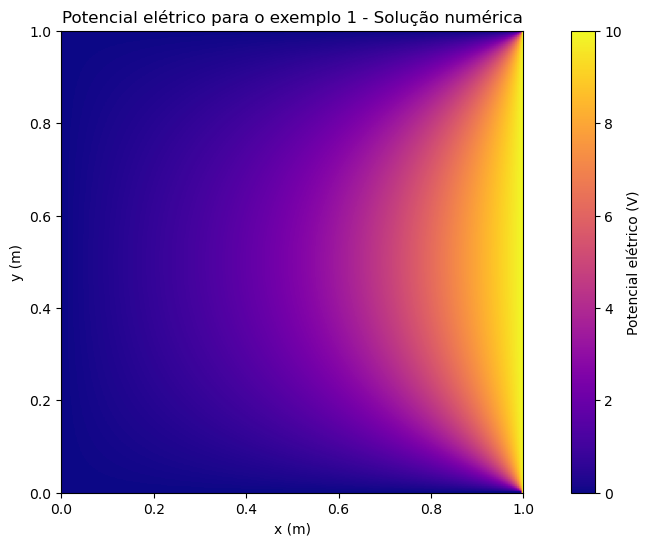

In [7]:
#Aqui, fazemos apenas o gráfico de densidade do potencial utilizando a funão 'imshow' da biblioteca matplotlib.
plt.figure(figsize =(8,6))
plt.imshow(Phi, extent=[0, 1, 0, 1], origin="lower", cmap="plasma", aspect="auto")
plt.colorbar(label = "Potencial elétrico (V)" )
plt.title("Potencial elétrico para o exemplo 1 - Solução numérica")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.axis("scaled")
plt.show()

$\quad$ Agora que temos a solução numérica, vamos lembrar de (30) e buscar representar a solução analítica como um gráfico de densidade da mesma maneira para a solução numérica, para comparar ambas as soluções. A implementação do código para a solução analítica é muito mais direta que a resolução numérica da *Equação de Laplace*.

In [9]:
#Vamos definir o número de termos que a Série de Fourier terá. A função seno hiperbólica sobe rapidamente quando aumentamos o valor de 'n'. 
#Isso é problemático para o computador, mesmo que haja a divisão entre dois deles na nossa solução analítica. Analiticamente, a função potencial
#é bem comportada, porém se o nosso número de elementos na Série for muito elevado, o computador apresentará dificuldades de desenvolver essas contas
#individualmente, impossibilitando o cálculo. 100 termos nos garante uma boa aproximação e bom trabalho computacional.
Nmax = 100  # Número máximo de termos da série

In [10]:
#Agora, vamos definir o espaço de variação das variáveis x e y. 
x = np.linspace(0, 1, 200)  # Intervalo para x (de 0 a 1)
y = np.linspace(0, 1, 200)  # Intervalo para y (de 0 a 1)

In [11]:
#Aqui, utilizamos a função 'meshgrid' da biblioteca numpy. Ela é conveniente pois, utiliza os vetores definidos anteriormente e o transforma em matrizes,
#sendo repetições do vetor original. Isso permite que, ao trabalharmos com funções que percorram pontos nas coordenadas, possam fazê-lo sem necessidades
#de laços, que são mais custosos computacionalmente. As matrizes geradas, quando sobrepostas, funcionam como o plano cartesiano.
X, Y = np.meshgrid(x, y)  # Cria a grade de valores (X, Y)

In [12]:
#Agora, definimos nossa função potencial teórica. Ela será uma matriz com o mesmo número de elementos que as matrizes geradas pela função
#'meshgrid'.
Phiteo = np.zeros_like(X)

In [13]:
#Aqui, fazemos o laço que irá nos gerar os 100 primeiros termos da Série de Fourier, e portanto, nossa aproximação para a solução analítica.
for n in range(Nmax):
    #Calculamos o coeficiente de (30) que não depende de x ou y:
    cn = (40 / (np.sinh((2 * n + 1) * np.pi))) * (1 / ((2 * n + 1) * np.pi))
    #Agora, calculamos o termo que depende apenas de x:
    xn = np.sinh((2 * n + 1) * np.pi * X)
    #O que depende apenas de y:
    yn = np.sin((2 * n + 1) * np.pi * Y)
    #E por fim, multiplicamos todos eles, afim de obter cada termo completo da série.
    term = cn*xn*yn
    #Agora, somamos o resultado a cada iteração, obtendo finalmente a série
    Phiteo += term
#Graças à função 'meshgrid', o programa atualiza todas as posições do potencial instantaneamente, para todos os valores de x e y.

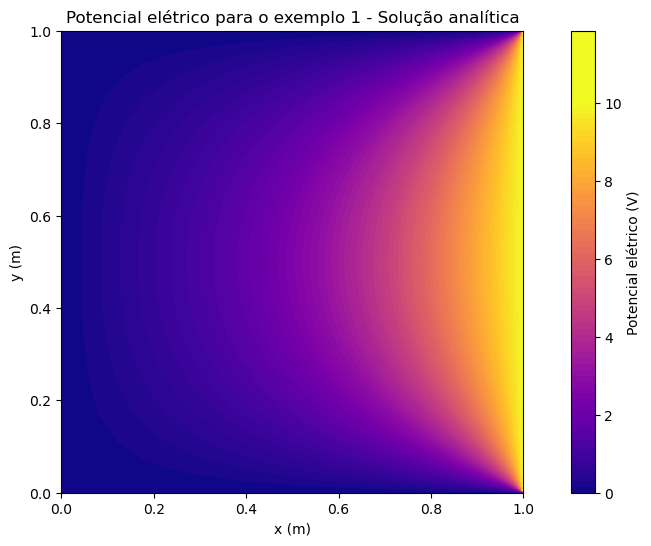

In [14]:
#Agora, faremos o gráfico de densidade do potencial determinado analiticamente usando a função 'contourf' da biblioteca matplotlib. Essa função
#é mais interessante que a 'imshow' para esse caso, pois nossa função foi calculada de maneira suavizada e não discretizada, como a função anterior.
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Phiteo, levels=100, cmap="plasma", vmax = 10)
plt.colorbar(label="Potencial elétrico (V)", ticks=np.linspace(0, 10, num=6))
plt.title("Potencial elétrico para o exemplo 1 - Solução analítica")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.axis("scaled")
plt.show()

$\quad$ Ao compararmos os resultados dos gráficos de densidade obtidos pela solução numérica e pela aproximação da solução analítica, percebemos que ambas as soluções concordam quase que perfeitamente. A distribuição do potencial se assemelha muito nos dois gráficos. Percebemos no gráfico da solução numérica, resquícios da discretização do espaço. Alguns pequenos quadrados são bem visíveis na imagem. Entretanto, lembramos que estamos usando uma distância muito grande entre os pontos da malha, quando comparada ao que se espera de uma derivada (distância praticamente nula). Se aumentássemos o tamanho da nossa malha, com certeza a distribuição ficaria mais suavizada e teríamos uma aproximação ainda maior. Entretanto, o custo computacional seria alto demais, gastando muito tempo para gerar uma solução.

$\quad$ Além disso, nossa solução analítica foi apenas aproximada. Se quiséssemos obter um gráfico exato, deváamos estender o somatório por todos os naturais (o que é impossível, mesmo para o computador). Assim, até mesmo a condição de contorno parece ter desviado um pouco do proposto pelo problema. Ao visualizar a barra de cores, nos é induzido que existem alguns pontos com potencial maior que $10 \ V$, o que não seria permitido. Entretanto, a limitação de termos da série com certeza é o fator limitante para essa divergência na solução.

#### Coordenadas polares - Exemplo 2

$\quad$ Vamos agora solucionar numericamente o exemplo 2. Usaremos as mesmas estratégias utilizadas para coordenadas cartesianas. Porém, como o laplaciano é um pouco mais complicado, podemos nos assustar à primeira vista. Usando as fórmulas da diferença centrada em (5), teremos, após algumas boas operações, que:

$$
\phi(r,\theta) = \frac{1}{2\left( \frac{1}{\Delta r^2} + \frac{1}{r^2 \Delta \theta^2}  \right)} \left(\frac{\phi(r + \Delta r,\theta) + \phi(r - \Delta r,\theta))}{\Delta r^2} + \frac{\phi(r + \Delta r,\theta) + \phi(r - \Delta r,\theta)}{2r\Delta r}  + \frac{\phi(r, \theta + \Delta \theta) + \phi(r, \theta - \Delta \theta)}{r^2 \Delta \theta^2}        \right). \tag{49}
$$

$\quad$ Na expressão (49), os termos $\Delta r$ e $\Delta \theta$ são as separações de distância das respectivas variáveis com a mesma função de $h$ na equação (48). Porém, tratávamos anteriormente com regiões quadradas e um sistema cartesiano, e podáamos usar o mesmo diferencial para separação em ambos os eixos. Para o caso de coordenadas polares, isso não é permitido.

$\quad$ Para acelerar a convergência, usaremos os mesmos algoritmos discutidos na resolução do exemplo 1. A adaptação para o sistema de coordenadas ao escrever o código não possui muitas complicações. Entretanto, faremos uma malha circular em nosso programa, proporcionando dessa vez uma separação radial e angular entre cada ponto.

$\quad$ Vamos então calcular a distribuição de potencial elétrico no interior de um círculo de raio $R = 1 \ m$, onde metade de seu perímetro possui potencial fixo $V_1 = 3 \ V$ e a outra metade também tem um potencial fixo, porém de sinal contrário, $V_2 = -3 \ V$. Vamos discretizar nosso sistema com 200 pontos em cada direção da nossa malha circular.

In [28]:
# Começamos definindo nossa malha circular (ou polar). Defininos nosso raio como a = 1m. Além disso, fazemos a malhar ter quantidade de pontos igual
#na direção radial e angular. Colocamos 200 pontos em cada direção. 
a = 1.0  # Raio máximo
N = 150
Nr, Ntheta = N,N

In [29]:
#Agora, criamos vetores para armazenar o intervalo de variação de nossas grandezas
r = np.linspace(0, a, Nr)
theta = np.linspace(0, 2 * np.pi, Ntheta)

In [30]:
#Aqui, definimos nossos diferenciais, necessários para o cálculo de (49). Ao contrário do caso cartesiano, não podemos nos apoiar no modo
#que faremos os laços para percorrer a malhar de forma  definir esses diferenciais.
dr = r[1] - r[0]
dtheta = theta[1] - theta[0]

In [31]:
#Finalmente, vamos definir nossa malha de potencial em forma polar. Primeiro, iniciamos uma matriz phi com as dimensões radiais e angulares
#definidas anteriormente. Deixamos toda a malha com potencial nulo.
phi = np.zeros((Nr, Ntheta))

In [32]:
#Agora, aplicamos as condições de contorno para o potencial.
phi[-1, 0:int(Ntheta / 2) + 1] = 3  # Metade da borda externa fixa em 3
phi[-1, int(Ntheta / 2):Ntheta] = -3  # Outra metade da borda fixa em -3
#Note que, usamos o índice -1 na primeira entrada da matriz potencial. Esse comando nos permite acessar diretamente o último elemento da linha
#ou coluna da matriz. Nesse caso, o último elemento representa o raio mais externo do círculo. O modo como essa matriz é feita impõe cada linha
#como um raio contante e cada coluna um ângulo constante. Assim, gera desenhos polares perfeitamente.

In [33]:
#Aqui, definimos a constante para o critério de convergência, a constante de sobrerelaxação (determinada empiricamente) e o fator de erro máximo
#para entrarmos no loop.
tol = 1e-6  
w = 1.94
erromax=10

In [34]:
#O laço principal para a solução em coordenadas polares se assemelha muito ao laço de coordenadas cartesianas. Dessa forma, iremos comentar
#apenas as diferenças.
while erromax > tol:
    erromax = 0
    for i in range(1, Nr - 1):  
        for j in range(Ntheta):  # Percorre as posições em theta. Como o ângulo é periódico, não precisamos impor restrições.
            #Agora, definimos os índices anterior e posterior em theta. Faremos essa definição manual afim de preservar as condições
            #periódicas para o potencial e para os ângulos.
            jm = (j - 1) % Ntheta  # Índice anterior em theta (com condições periódicas)
            jp = (j + 1) % Ntheta  # Índice posterior em theta (com condições periódicas)
            
            # Termos da equação de diferenças finitas no Laplaciano em coordenadas polares:
            term_r = (phi[i + 1, j] + phi[i - 1, j]) / dr**2
            term_theta = (phi[i, jp] + phi[i, jm]) / (dtheta**2 * r[i]**2)
            term_r2 = (phi[i + 1, j] - phi[i - 1, j]) / (2 * dr * r[i])
            #Agora, juntamos todos os termos da maneira que a equação (49) impõe. Utilizamos a mesma iteração de sobrerelaxação do caso cartesiano.
            aux = (term_r + term_theta + term_r2) / (2 / dr**2 + 2 / (dtheta**2 * r[i]**2))
            delta= aux - phi[i, j]
            phi[i, j] = phi[i, j] + w * (delta)
            erro = abs(delta)
            #Se o desvio para o determinado par ij for maior que o erro máximo atual, então esse desvio se tornará o maior erro.
            if erro>erromax:
                erromax = erro

In [35]:
#Agora, vamos usar a função 'meshgrid', mostrada anteriormente para transformar os parâmetro de raio e ângulo em função de coordenadas cartesianas
#x e y, para que nosso gráfico se apresente de maneira circular, como pretendemos.
R, THETA = np.meshgrid(r, theta, indexing='ij') #O parâmetro "indexing = 'ij" é utilizado para capturar as informações usando a convenção de índice de
#matriz. As linhas correspondem ao primeiro eixo(r) e as colunas o segundo (theta), assim como fizemos para definir a matriz do potencial

In [36]:
#Agora, usamos as transformações em (4) para obtermos as coordenadas cartesianas em função de grandezas polares. 
X, Y = R * np.cos(THETA), R * np.sin(THETA)

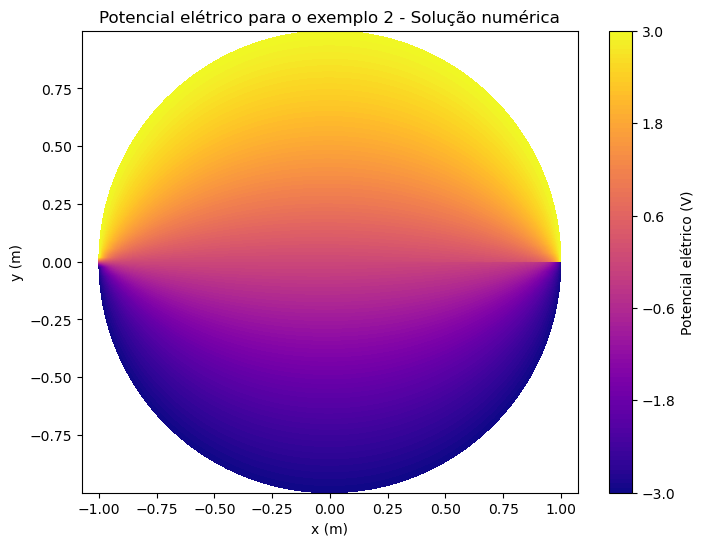

In [37]:
#Aqui, usamos a função 'contourf' para gerar o gráfico de densidade do potencial, sendo a solução numérica do exemplo 2. Usaremos ela ao invés
#de 'imshow' pois a distribuição para esse exemplo se mostrou muito suave, sendo melhor aproveitado esteticamente por essa função.
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, phi, levels=100, cmap="plasma")
plt.colorbar(label="Potencial elétrico (V)", ticks=np.linspace(-3, 3, num=6))
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Potencial elétrico para o exemplo 2 - Solução numérica")
plt.axis("equal")
plt.show()

$\quad$ Com a solução numérica em mãos, vamos utilizar (46) para gerar um gráfico de densidade da solução analítica. Como a solução foi dada em termos de funções elementares, nossa distribuição de potencial obtida será a solução mais precisa possível.

In [39]:
#Primeiro, vamos aproveitar os vetores r e theta definidos anteriormente, e vamos usá-los como base para gerar matrizes que representam
#os eixos das coordenadas polares. Fazemos isso para trabalhar com as funções em cada par ordenado de raio e ângulo, sem necessidade de laços.
RHO, PHI = np.meshgrid(r, theta, indexing='ij')

In [40]:
#Agora, substituimos na nossa expressão (46) e calculamos a distruibuição aumaticamente para toda a grade de valores
phi_teo = (6/ np.pi) * np.arctan2(2 * RHO * np.sin(PHI), 1 - RHO**2)

In [41]:
# Conversão para coordenadas cartesianas, afim de deixar o gráfico com a distribuição circular.
X = RHO * np.cos(PHI)
Y = RHO * np.sin(PHI)

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_facecolor'

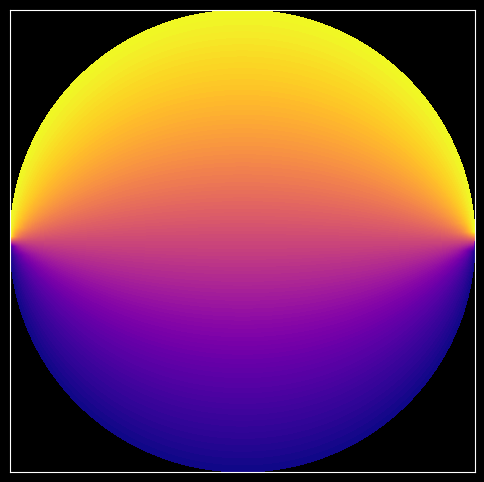

In [81]:
# Plot do gráfico de densidade, usando 'contourf' novamente.
plt.figure(figsize=(6, 6))
plt.contourf(X, Y, phi_teo, levels=100, cmap="plasma")
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.set_facecolor("black")
plt.savefig("minha_bola.png")
plt.show()

$\quad$ Comparando os gráficos obtidos, vemos que a distribuição de potencial para os dois casos se assemelhou profundamente. Na solução numérica, percebemos que na divisão horizontal que separa o círculo em duas metades, há regiões de transição mais abrupta de potencial. Por outro lado, na solução analítica, em todo o domínio, as transições foram suaves. Talvez essa tenha sido a maior diferença entre os resultados. Possivelmente, se aumentássemos a nossa malhar e fizéssemos a tolerância ser menor ainda, a transição na solução numérica seria totalmente suavizada. Entretanto, seria muito custoso computacionalmente.

## Conclusão

$\quad$ Esse `Notebook` buscou explorar a *Equação de Laplace* aplicada à eletrostática, mostrando maneiras de resolvê-la a depender das condições de contorno e dos sistemas de coordenadas. Fizemos exemplos para ilustrar a resolução de problemas tratados de maneira bidimensional e obtivemos soluções analíticas bem fechadas para esses exemplos. Além disso, utilizamos técnicas de cálculo numérico para gerar soluções dos mesmos exemplos, a partir de aproximações de derivadas. Notamos que o sistema de coordenadas também influenciava na maneira como as malhas de potencial eram geradas. 

$\quad$ Posteriormente, geramos gráficos para retratar a distribuição de potencial a partir das soluções analíticas. Ao compararmos os resultados, notamos que as soluções concordam entre si. Ambas as distribuições de cada exemplo se assemelhasseem fielmente. Com isso, concluímos que o objetivo do    `Notebook` foi alcançado com êxito. 

## Referências

[1] Newman, Mark. 2013. Computational Physics. 1 ed.

[2] Arfken, George; Weber, Hans; Harris, Frank. 2013. Mathematical Methods for Physicists. 7 ed.

[3] Russman, Felipe. 2019. Teoria Eletromagnética I.

[4] Guidorizzi, Hamilton. 2002. Um curso de cálculo. Vol. 4. 5 ed.

[5] Boyce, William; DiPrima, Richard. 2006. Equações Diferenciais Elementares e Problemas de Valores de Contorno. 8 ed.